# Example output

Example of a LOSVD extracted from spectral fitting, using a spectrum from NGC1023 taken from [ATLAS 3D](https://www-astro.physics.ox.ac.uk/atlas3d/).

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import dill

In [65]:
with open('../output/mcmc_result.out', 'rb') as file:
    spectral_fit = dill.load(file)

Fit to the data:

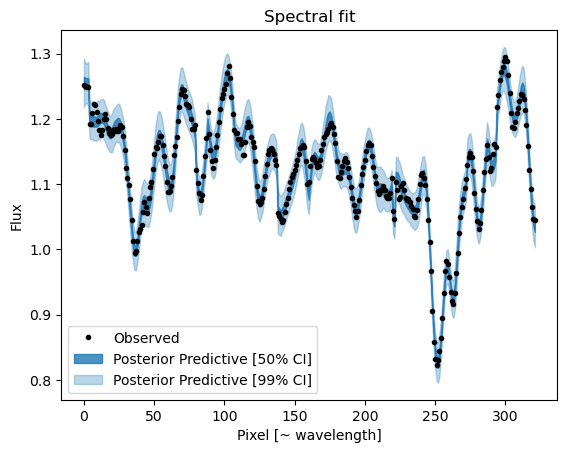

In [66]:
mask = np.load('../data/emission_line_mask.npy')
pixel = np.arange(np.sum(mask))
plt.plot(pixel, spectral_fit['data']['lspec'][mask], '.k', label='Observed')

lo, hi = np.percentile(spectral_fit['posterior_predictive']['y'], [25,75], 0)
plt.fill_between(pixel, lo, hi, alpha=0.8, color='C0', label='Posterior Predictive [50% CI]')

lo, hi = np.percentile(spectral_fit['posterior_predictive']['y'], [0.5, 99.5], 0)
plt.fill_between(pixel, lo, hi, alpha=0.3, color='C0', label='Posterior Predictive [99% CI]')

plt.gca().set_xlabel('Pixel [~ wavelength]')
plt.gca().set_ylabel('Flux')
plt.gca().set_title('Spectral fit')
plt.legend()

Corner plot of five parameters of the LOSVD model:

- `v`: mean velocity
- `sigma`: velocity dispersion
- `sigmaK`: controls overall non-Gaussianity
- `delta`: controls skewness
- `kappa`: controls kurtosis

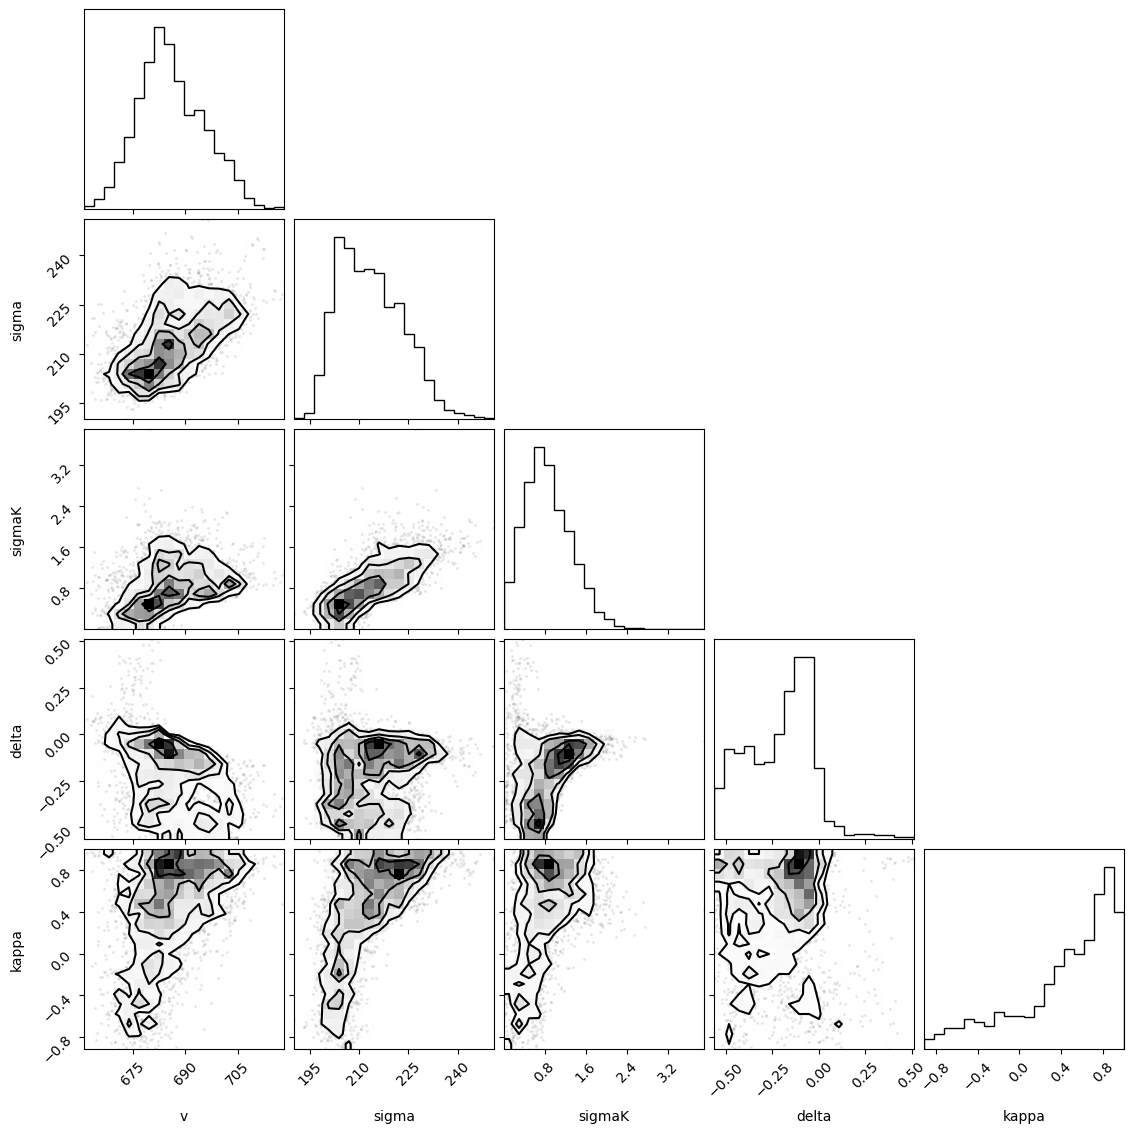

In [67]:
mcmc = spectral_fit['mcmc']
posterior_samples = mcmc.get_samples(group_by_chain=True)
corner_plot = corner.corner(posterior_samples, var_names=['v', 'sigma', 'sigmaK', 'delta', 'kappa'])

Text(0.5, 1.0, 'Recovered Non-Gaussian LOSVD')

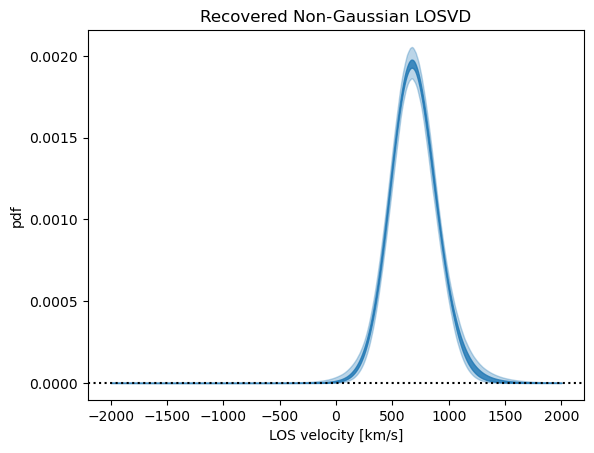

In [68]:
v, losvd = spectral_fit['posterior_predictive']['losvd']
v = v[0]

lo, hi = np.percentile(losvd, [25,75], 0)
_ = plt.fill_between(v, lo, hi, color='C0', alpha=0.8, label='[50% CI]')

lo, hi = np.percentile(losvd, [0.5, 99.5], 0)
_ = plt.fill_between(v, lo, hi, color='C0', alpha=0.3, label='[99% CI]')

plt.gca().axhline(0, ls=':', color='k')
plt.gca().set_xlabel('LOS velocity [km/s]')
plt.gca().set_ylabel('pdf')
plt.gca().set_title('Recovered Non-Gaussian LOSVD')